In [1]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/hgsgautam/Desktop/Python/PythonGIT/kickstarter.csv')

In [4]:
df.head(10)

,id,name,goal,pledged,state,country,currency,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight
0,1526127826,conceptual-waist-aprons,300.0,321.00,successful,US,USD,True,False,18,1.000000,321.000000,Conceptual Art,True
1,2007987502,mjolby-porslinsravsmuseum-pin,3000.0,7070.00,successful,SE,SEK,True,False,79,0.121226,857.068103,Conceptual Art,True
2,1075407414,cool-dog-annual-sticker-fund-2016,3200.0,4431.12,successful,US,USD,True,False,148,1.000000,4431.120000,Conceptual Art,True
3,1038608633,uss-coral-sea-cvb-cva-cv-43-commemorative-chal...,2100.0,2500.00,successful,US,USD,True,False,56,1.000000,2500.000000,Conceptual Art,True
4,451699826,amrita-bottles-inc,1950.0,2240.00,successful,US,USD,True,False,31,1.000000,2240.000000,Conceptual Art,True
5,1765015841,draw-like-a-boss,30000.0,51833.32,successful,GB,GBP,False,False,1633,1.551660,80427.699680,Conceptual Art,True
6,1881968040,art-and-soul-body-painting-self-acceptance-aft...,300.0,322.00,successful,US,USD,True,False,14,1.000000,322.000000,Conceptual Art,True
7,1624053431,art-of-words-pop-artist,12000.0,12568.00,successful,US,USD,True,False,148,1.000000,12568.000000,Conceptual Art,True
8,759609400,the-new-oklahomaa-plan-to-improve-the-worst-pa...,100.0,1060.01,successful,US,USD,True,False,50,1.000000,1060.010000,Conceptual Art,True
9,96887393,mapping-budapest-budpst,500.0,615.00,successful,GB,GBP,False,False,34,1.520110,934.867835,Conceptual Art,True


In [5]:
df.describe

<bound method DataFrame.describe of               id                                               name      goal  \
0     1526127826                            conceptual-waist-aprons     300.0   
1     2007987502                      mjolby-porslinsravsmuseum-pin    3000.0   
2     1075407414                  cool-dog-annual-sticker-fund-2016    3200.0   
3     1038608633  uss-coral-sea-cvb-cva-cv-43-commemorative-chal...    2100.0   
4      451699826                                 amrita-bottles-inc    1950.0   
5     1765015841                                   draw-like-a-boss   30000.0   
6     1881968040  art-and-soul-body-painting-self-acceptance-aft...     300.0   
7     1624053431                            art-of-words-pop-artist   12000.0   
8      759609400  the-new-oklahomaa-plan-to-improve-the-worst-pa...     100.0   
9       96887393                            mapping-budapest-budpst     500.0   
10    1812065143                                      southern-rims    15

# Visualize and describe the distribution of pledged U.S. dollars (usd_pledged). These amounts represents the total funds raised in U.S. dollars for each project in the data set.

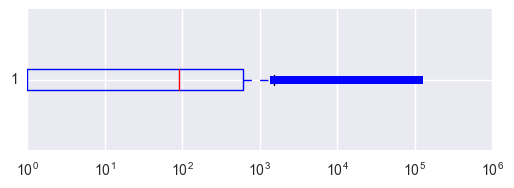

In [6]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.boxplot(df.usd_pledged, 0,'rs',0)
ax.set_xscale('log')

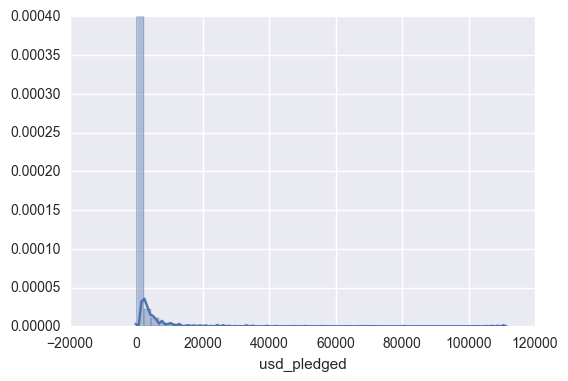

In [23]:
sns.distplot(df.usd_pledged)

# Visualize and describe the relationship between the number of backers (i.e., contributors) and pledged U.S. dollars. Also, report any quantitative results that may support your description.

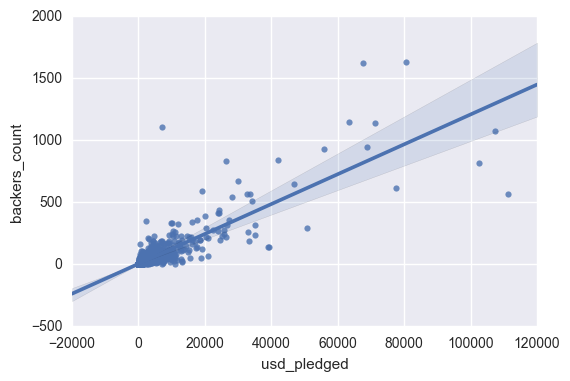

In [26]:
sns.regplot(df.usd_pledged, df.backers_count)

# Calculate a new column that contains the ratio of pledged amounts to the goal amounts, then visualize the distribution of these ratios as a function of the state of the fundraising campaign (e.g., successful, failed, etc.). How do the distributions compare to each other? 

In [9]:
nc =[]

In [10]:
nc = (df.pledged/df.goal)

In [11]:
df['Ratio'] = nc 

In [12]:
categories = df.category.unique()
print(categories)

['Conceptual Art' 'Digital Art' 'Illustration' 'Painting' 'Ceramics']


In [13]:
dfbuffer1 = df[df.category == 'Conceptual Art']
dfbuffer2 = df[df.category == 'Digital Art']
dfbuffer3 = df[df.category == 'Illustration']
dfbuffer4 = df[df.category == 'Painting']
dfbuffer5 = df[df.category == 'Ceramics']

In [14]:
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
for i in dfbuffer1.Ratio:
           x1.append(i)
for i in dfbuffer2.Ratio:
           x2.append(i)
for i in dfbuffer3.Ratio:
           x3.append(i)
for i in dfbuffer4.Ratio:
           x4.append(i)
for i in dfbuffer5.Ratio:
           x5.append(i)

In [15]:
data_to_plot = [x1, x2, x3, x4, x5]

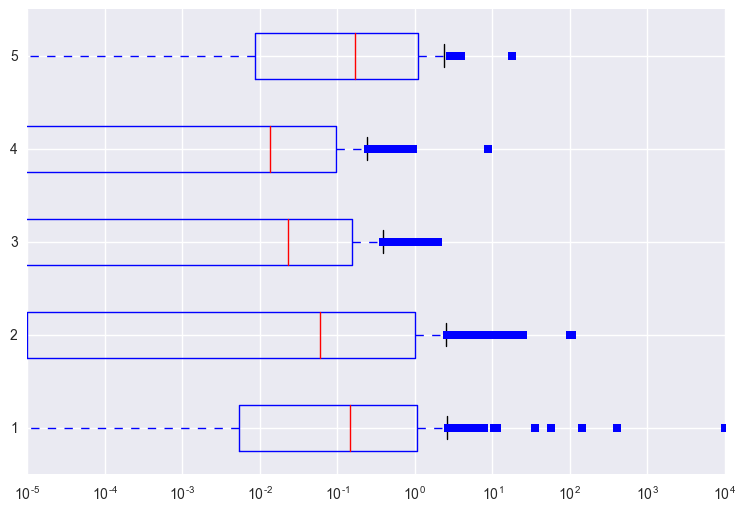

In [21]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot,  0,'rs',0)
ax.set_xscale('log')

# What is the success rate for campaigns as a function of the campaign category? You may consider only successful and failed campaigns (i.e., you may ignore live, suspended, or cancelled campaigns). Comment on any trends you observe relative to success rates across different campaign categories. What is the mean pledged U.S. dollars for successful campaigns as a function of each campaign category? Which category earns the highest pledged U.S. dollars on average?

In [17]:
for i in categories:
    x = df[(df.category == i) & (df.state == 'successful')]
    a = float(x['state'].count())
    MeanAvg = x['usd_pledged'].mean()
    y = df[(df.category == i) & (df.state == 'failed')]
    b = float(y['state'].count())
    if a == 0:
        print(i + ':' + str(0)+ '%')
        print('Mean USD pledge for succesful campaigns of this category is = ' + str(0))
    elif b == 0:
        print(i + ':' + str(100) + '%')
        print('Mean USD pledge for succesful campaigns of this category is = ' + str(MeanAvg))
    else :
        print(i + ':' + str((a/(a+b))*100) + '%')
        print('Mean USD pledge for succesful campaigns of this category is = ' + str(MeanAvg))
    print('\n')

Conceptual Art:40.5541561713%
Mean USD pledge for succesful campaigns of this category is = 3580.38768163


Digital Art:31.3253012048%
Mean USD pledge for succesful campaigns of this category is = 6304.50040695


Illustration:0%
Mean USD pledge for succesful campaigns of this category is = 0


Painting:0%
Mean USD pledge for succesful campaigns of this category is = 0


Ceramics:45.9016393443%
Mean USD pledge for succesful campaigns of this category is = 10824.8128594


